<a href="https://colab.research.google.com/github/sayarghoshroy/Scientific_Doc_Summarization/blob/master/budget_evals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# To Run on LaySumm 
file_name = "/content/drive/My Drive/pickled_stats/stats_LaySumm_Combined.pickle"

# To Run on PubMed
# file_name = "/content/drive/My Drive/pickled_stats/stats_PubMed.pickle"
data = pickle.load(open(file_name, 'rb'))

In [4]:
size = len([key for key in data.keys()])
print("Number of Section Types: ", size)

Number of Section Types:  4375


In [5]:
# Combining Certain Sections
regex = re.compile('[^a-zA-Z\ ]')

pure_stats = {}

for key in data.keys():
  name = key.lower()
  # 1st parameter is the replacement, 2nd parameter is the input string
  pure_name = regex.sub('', name).strip()

  if pure_name not in pure_stats:
    pure_stats[pure_name] = {}
    pure_stats[pure_name]['count'] = data[key]['count']
    pure_stats[pure_name]['lengths'] = data[key]['lengths']
    pure_stats[pure_name]['rouge_measures'] = data[key]['rouge_measures']

  else:
    pure_stats[pure_name]['count'] += data[key]['count']
    pure_stats[pure_name]['lengths'] = pure_stats[pure_name]['lengths'] + data[key]['lengths']
    pure_stats[pure_name]['rouge_measures'] = pure_stats[pure_name]['rouge_measures'] + data[key]['rouge_measures']

In [6]:
# use pure_stats as data
data = pure_stats

In [7]:
intro_counts = data['introduction']['count']
print("Count of Introductions: ", intro_counts)

Count of Introductions:  556


In [8]:
section_res = {}
consider = intro_counts * 0.05
# i.e 5% of intro_counts

for section in data.keys():
  if data[section]['count'] < consider:
    continue
  len_avg = np.mean(np.asarray(data[section]['lengths']))
  len_var = np.var(np.asarray(data[section]['lengths']))

  r_1 = []
  r_2 = []
  r_l = []

  for r in data[section]['rouge_measures']:
    r_1.append(r[0])
    r_2.append(r[3])
    r_l.append(r[6])

  r_1_avg = np.mean(np.asarray(r_1))
  r_1_var = np.var(np.asarray(r_1))

  r_2_avg = np.mean(np.asarray(r_2))
  r_2_var = np.var(np.asarray(r_2))

  r_l_avg = np.mean(np.asarray(r_l))
  r_l_var = np.var(np.asarray(r_l))

  section_res[section] = {}

  section_res[section]['len_avg'] = len_avg
  section_res[section]['len_var'] = len_var

  section_res[section]['r_1_avg'] = r_1_avg
  section_res[section]['r_1_var'] = r_1_var

  section_res[section]['r_2_avg'] = r_2_avg
  section_res[section]['r_2_var'] = r_2_var

  section_res[section]['r_l_avg'] = r_l_avg
  section_res[section]['r_l_var'] = r_l_var

In [9]:
# Uncomment to check section_res creation
# section_res

In [10]:
names = list(section_res.keys())
values = list(section_res.values())

In [11]:
print(values)

[{'len_avg': 3767.154676258993, 'len_var': 4840169.407729931, 'r_1_avg': 38.841543930548056, 'r_1_var': 107.18401378551152, 'r_2_avg': 13.927484210986766, 'r_2_var': 29.700413400571897, 'r_l_avg': 31.73613805453571, 'r_l_var': 41.386203344849214}, {'len_avg': 1543.888888888889, 'len_var': 1088558.3432098767, 'r_1_avg': 38.99860518565448, 'r_1_var': 92.16833149593793, 'r_2_avg': 13.475389639367755, 'r_2_var': 63.28467328948972, 'r_l_avg': 33.17780868739008, 'r_l_var': 75.83419744615483}, {'len_avg': 2197.8, 'len_var': 5511713.048888888, 'r_1_avg': 27.68893470801753, 'r_1_var': 107.03618410625592, 'r_2_avg': 6.238506335553771, 'r_2_var': 25.416564400474403, 'r_l_avg': 22.109778778480077, 'r_l_var': 55.03687952727545}, {'len_avg': 2352.297727272727, 'len_var': 5272207.259085744, 'r_1_avg': 32.874480386287516, 'r_1_var': 109.91600633162729, 'r_2_avg': 8.993364402209604, 'r_2_var': 30.621455851494456, 'r_l_avg': 26.63954649293545, 'r_l_var': 57.03266312596368}, {'len_avg': 7076.008602150538

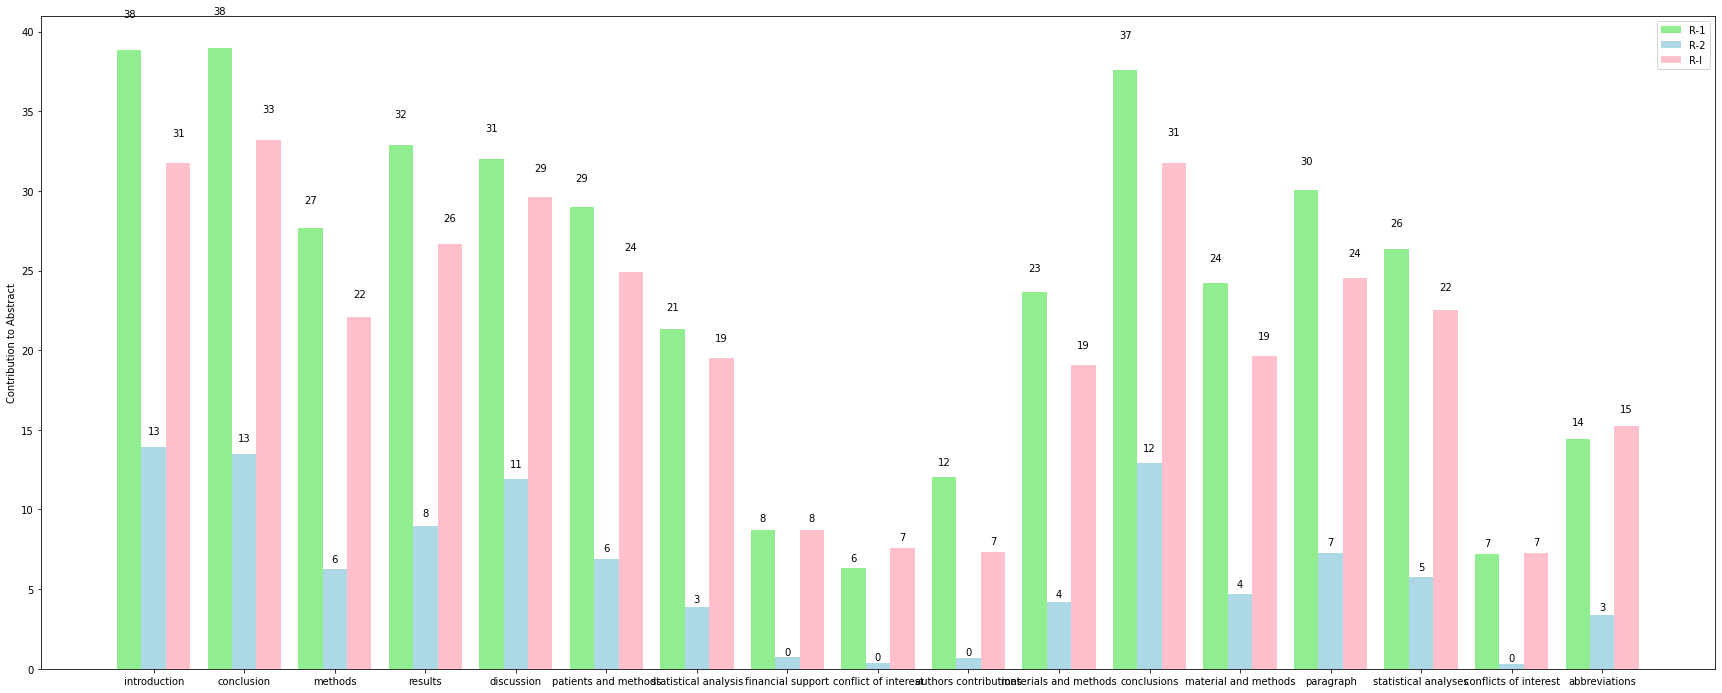

In [12]:
R1 = [section_res[name]['r_1_avg'] for name in section_res.keys()]
R2 = [section_res[name]['r_2_avg'] for name in section_res.keys()]
RL = [section_res[name]['r_l_avg'] for name in section_res.keys()]

N = len([key for key in section_res.keys()])
ind = np.arange(N)
# the x locations for the groups
width = 0.27
# the width of the bars

fig = plt.figure(figsize = (30, 12))
vis = fig.add_subplot(111)

R1_bar = vis.bar(ind, R1, width, color='lightgreen')
R2_bar = vis.bar(ind + width, R2, width, color='lightblue')
RL_bar = vis.bar(ind + width * 2, RL, width, color='pink')

vis.set_ylabel('Contribution to Abstract')
vis.set_xticks(ind + width)
vis.set_xticklabels(tuple(names))
vis.legend((R1_bar[0], R2_bar[0], RL_bar[0]), ('R-1', 'R-2', 'R-l') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        vis.text(rect.get_x() + rect.get_width() / 2.0, 1.05 * h, '%d'%int(h), ha = 'center', va = 'bottom')

autolabel(R1_bar)
autolabel(R2_bar)
autolabel(RL_bar)

plt.savefig('LaySumm_contrib.png')

plt.show()

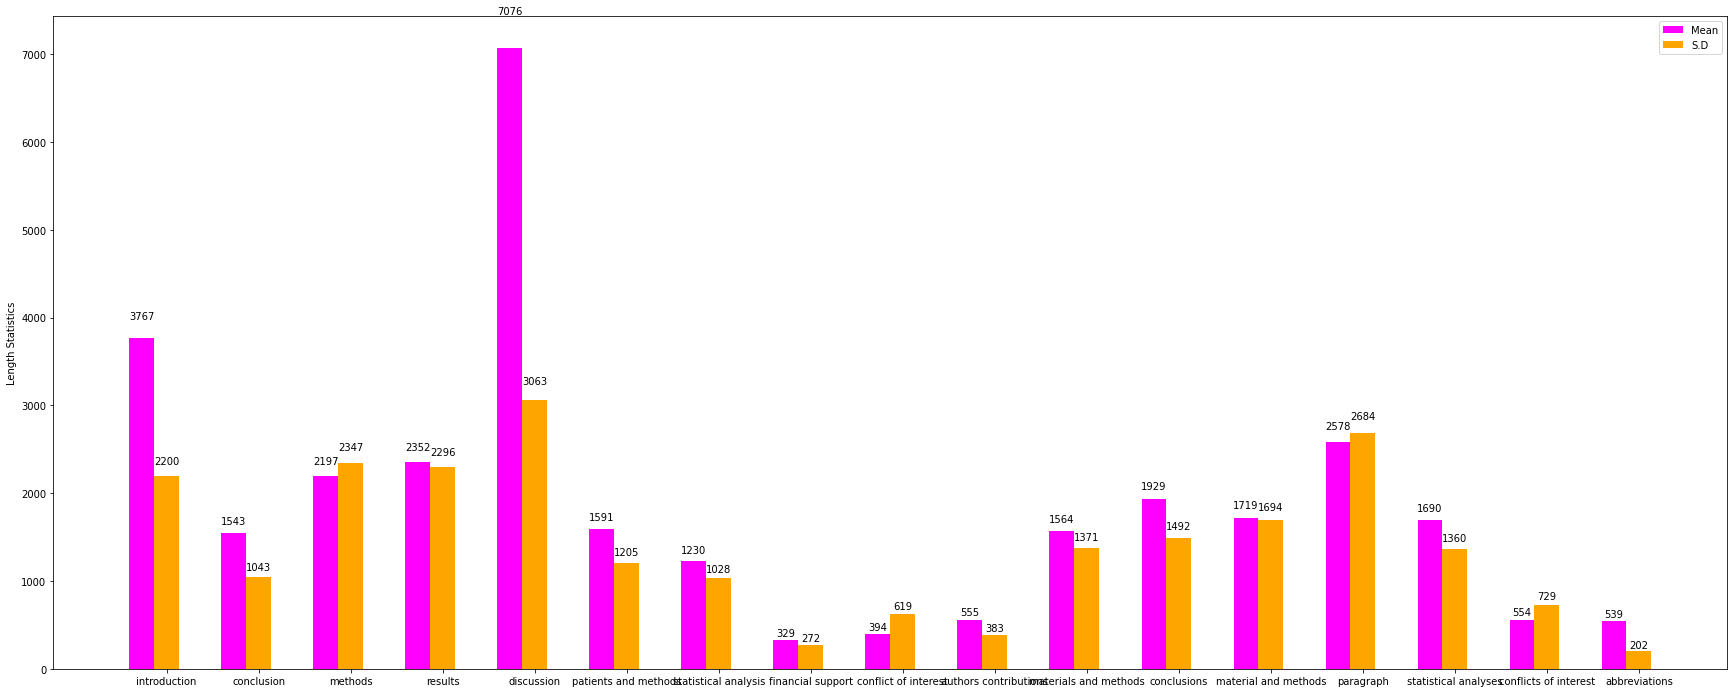

In [13]:
# length plots
L_mean = [section_res[name]['len_avg'] for name in section_res.keys()]
L_dev = [np.sqrt(section_res[name]['len_var']) for name in section_res.keys()]

N = len([key for key in section_res.keys()])
ind = np.arange(N)
# the x locations for the groups
width = 0.27
# the width of the bars

fig = plt.figure(figsize = (30, 12))
vis = fig.add_subplot(111)

L_mean_bar = vis.bar(ind, L_mean, width, color='magenta')
L_dev_bar = vis.bar(ind + width, L_dev, width, color='orange')

vis.set_ylabel('Length Statistics')
vis.set_xticks(ind + width)
vis.set_xticklabels(tuple(names))
vis.legend((L_mean_bar[0], L_dev_bar[0]), ('Mean', 'S.D') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        vis.text(rect.get_x() + rect.get_width() / 2.0, 1.05 * h, '%d'%int(h), ha = 'center', va = 'bottom')

autolabel(L_mean_bar)
autolabel(L_dev_bar)

plt.savefig('LaySumm_lengths.png')

plt.show()

In [14]:
# Conclusion is a very important section